In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [21]:
dataFile = r'/Users/fanchang/Downloads/A65_6DoF_SFR_20170807153032.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv(dataFile, parse_dates=['date'], date_parser=dateparse)

In [3]:
df.head()

,serial_number,status,name,date,time,numeric_value,numeric_min,numeric_max
0,7512P00001,PASS,BottomLeft_SFR_Ny2_V,2017-05-17,06:59:09,0.2889,0.28,1.0
1,7512P00001,PASS,BottomRight_SFR_Ny4_V,2017-05-17,06:59:09,0.6377,0.40,1.0
2,7512P00001,PASS,Center_SFR_Ny4_V,2017-05-17,06:59:09,0.8242,0.60,1.0
3,7512P00001,PASS,TopRight_SFR_Ny4_V,2017-05-17,06:59:09,0.6348,0.40,1.0
4,7512P00001,PASS,BottomLeft_SFR_Ny2_H,2017-05-17,06:59:09,0.4862,0.28,1.0


In [15]:
sfrStatus=df.status.unique()

In [8]:
sfrMetrics=df.name.unique()

In [7]:
len(df.name.unique())

61

In [18]:
for status in sfrStatus:
    for metrics in sfrMetrics:
        temp = df[df.status==status]
        temp[temp.name==metrics].to_csv(str(metrics)+'_'+str(status)+'.csv',sep=',')

In [22]:
type(df.date)

pandas.core.series.Series

In [24]:
df2 = pd.read_csv('Center_SFR_Ny4_H_1_PASS.csv')

In [27]:
df2.head()

,Unnamed: 0,serial_number,status,name,date,time,numeric_value,numeric_min,numeric_max
0,12216,0,PASS,Center_SFR_Ny4_H_1,2017-07-19,03:58:38,0.8691,0.6,1.0
1,12307,7520P00002,PASS,Center_SFR_Ny4_H_1,2017-07-19,10:35:33,0.8838,0.6,1.0
2,12333,7520P00002,PASS,Center_SFR_Ny4_H_1,2017-07-19,04:01:37,0.8789,0.6,1.0
3,12735,7520P00002,PASS,Center_SFR_Ny4_H_1,2017-07-20,06:11:48,0.8486,0.6,1.0
4,12837,7520P00002,PASS,Center_SFR_Ny4_H_1,2017-07-20,06:26:30,0.8716,0.6,1.0


In [52]:
testDate = df2.date.unique()
dailyCount = np.zeros(len(testDate))
for index in range(len(testDate)):
    dutSN=df2[df2.date==testDate[index]].serial_number.unique()
    dailyCount[index] = countSN(dutSN, 10)
    

In [44]:
dutSN=df2[df2.date=='2017-07-19'].serial_number.unique()

In [50]:
def countSN(dutSN, digit):
    count = 1
    for index in range(len(dutSN)):
        if len(dutSN)>digit: 
            count += 1
    return count

In [51]:
countSN(dutSN,10)

1

In [53]:
dailyCount

array([   1.,   16.,   46.,   33.,  133.,  103.,   45.,   52.,   42.,
         12.,   23.,    1.,    1.,    1.,    1.,    1.,    1.])

In [64]:
import matplotlib.dates
print testDate

['2017-07-19' '2017-07-20' '2017-07-21' '2017-07-22' '2017-07-24'
 '2017-07-25' '2017-07-26' '2017-07-27' '2017-07-28' '2017-07-29'
 '2017-07-31' '2017-08-01' '2017-08-02' '2017-08-03' '2017-08-04'
 '2017-08-05' '2017-08-07']


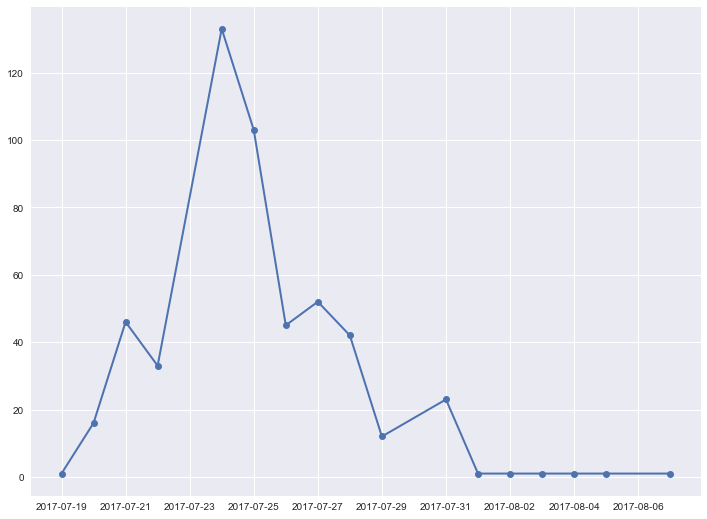

In [75]:
plt.figure(figsize=(12,9))
plt.plot_date(testDate, dailyCount,'-o',lw=2)